In [235]:
# In this project we are doing the machin learning model hyperparameter optimization using three technique's
# Grid search, Randomised search and Bayesian search 
# Hyper parameter optimization is essential step is machine learning project, after training machine learning model we need to finetune
# models so that they perform well on the given dataset
# we are going use three hyperparameter optimization technique, Grid search, Randomised search, Bayesian search

In [236]:
# Import the key libraries and datasets

In [237]:
import pandas as pd # For dataframe manupulation, excel in python
import numpy as np # for numerical analysis, arrays manupulation
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import mlflow
import mlflow.sklearn
%matplotlib inline
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
# As the mlflow server is running locally, tracking_uri is required to upload model artefact, metrics to it.

In [238]:
# Lets read the data

add_df = pd.read_csv('university_admission.csv')

In [239]:
add_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [240]:
# Lets explore the datasets
add_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [241]:
add_df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [242]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [243]:
add_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [244]:
# lets check for null values
add_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

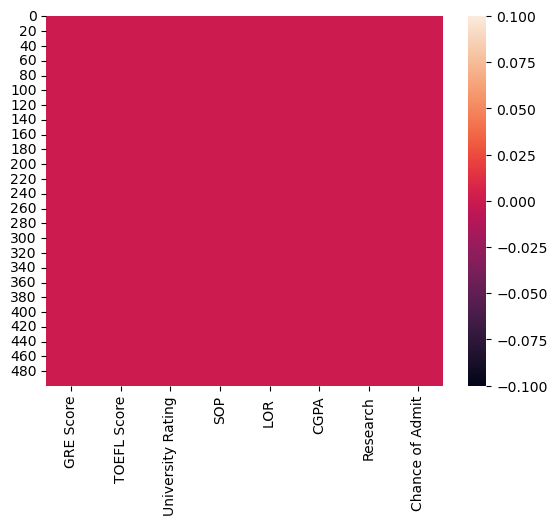

In [245]:
sns.heatmap(add_df.isnull()) # solid single colour means no null in dataframe

In [246]:
# Practise opportunity 
# Calculate the average, minimum and maximum chances of admission using two different techniques
add_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [247]:
# Lets explore new strategies for get those number
add_df.max()

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
Chance of Admit        0.97
dtype: float64

In [248]:
add_df.min()

GRE Score            290.00
TOEFL Score           92.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   6.80
Research               0.00
Chance of Admit        0.34
dtype: float64

In [249]:
add_df.mean()

GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64

In [250]:
# Lets perform the data-visulation and prepare data for model training

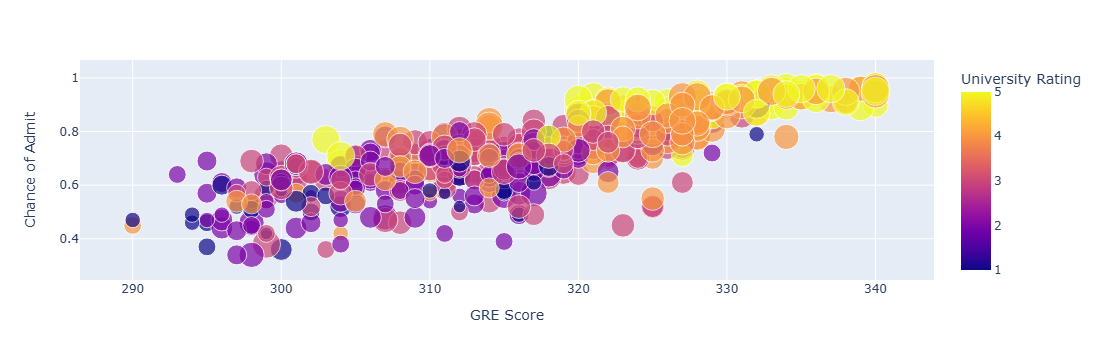

In [251]:
import plotly.express as px # It is used for interactive visualizations

#sns.scatterplot(x = 'Chance of Admit', y = 'GRE Score', data = add_df, hue = 'University Rating')

fig = px.scatter(data_frame = add_df, x = 'GRE Score', y = 'Chance of Admit', color = 'University Rating', size = 'SOP')
fig.show()

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarn

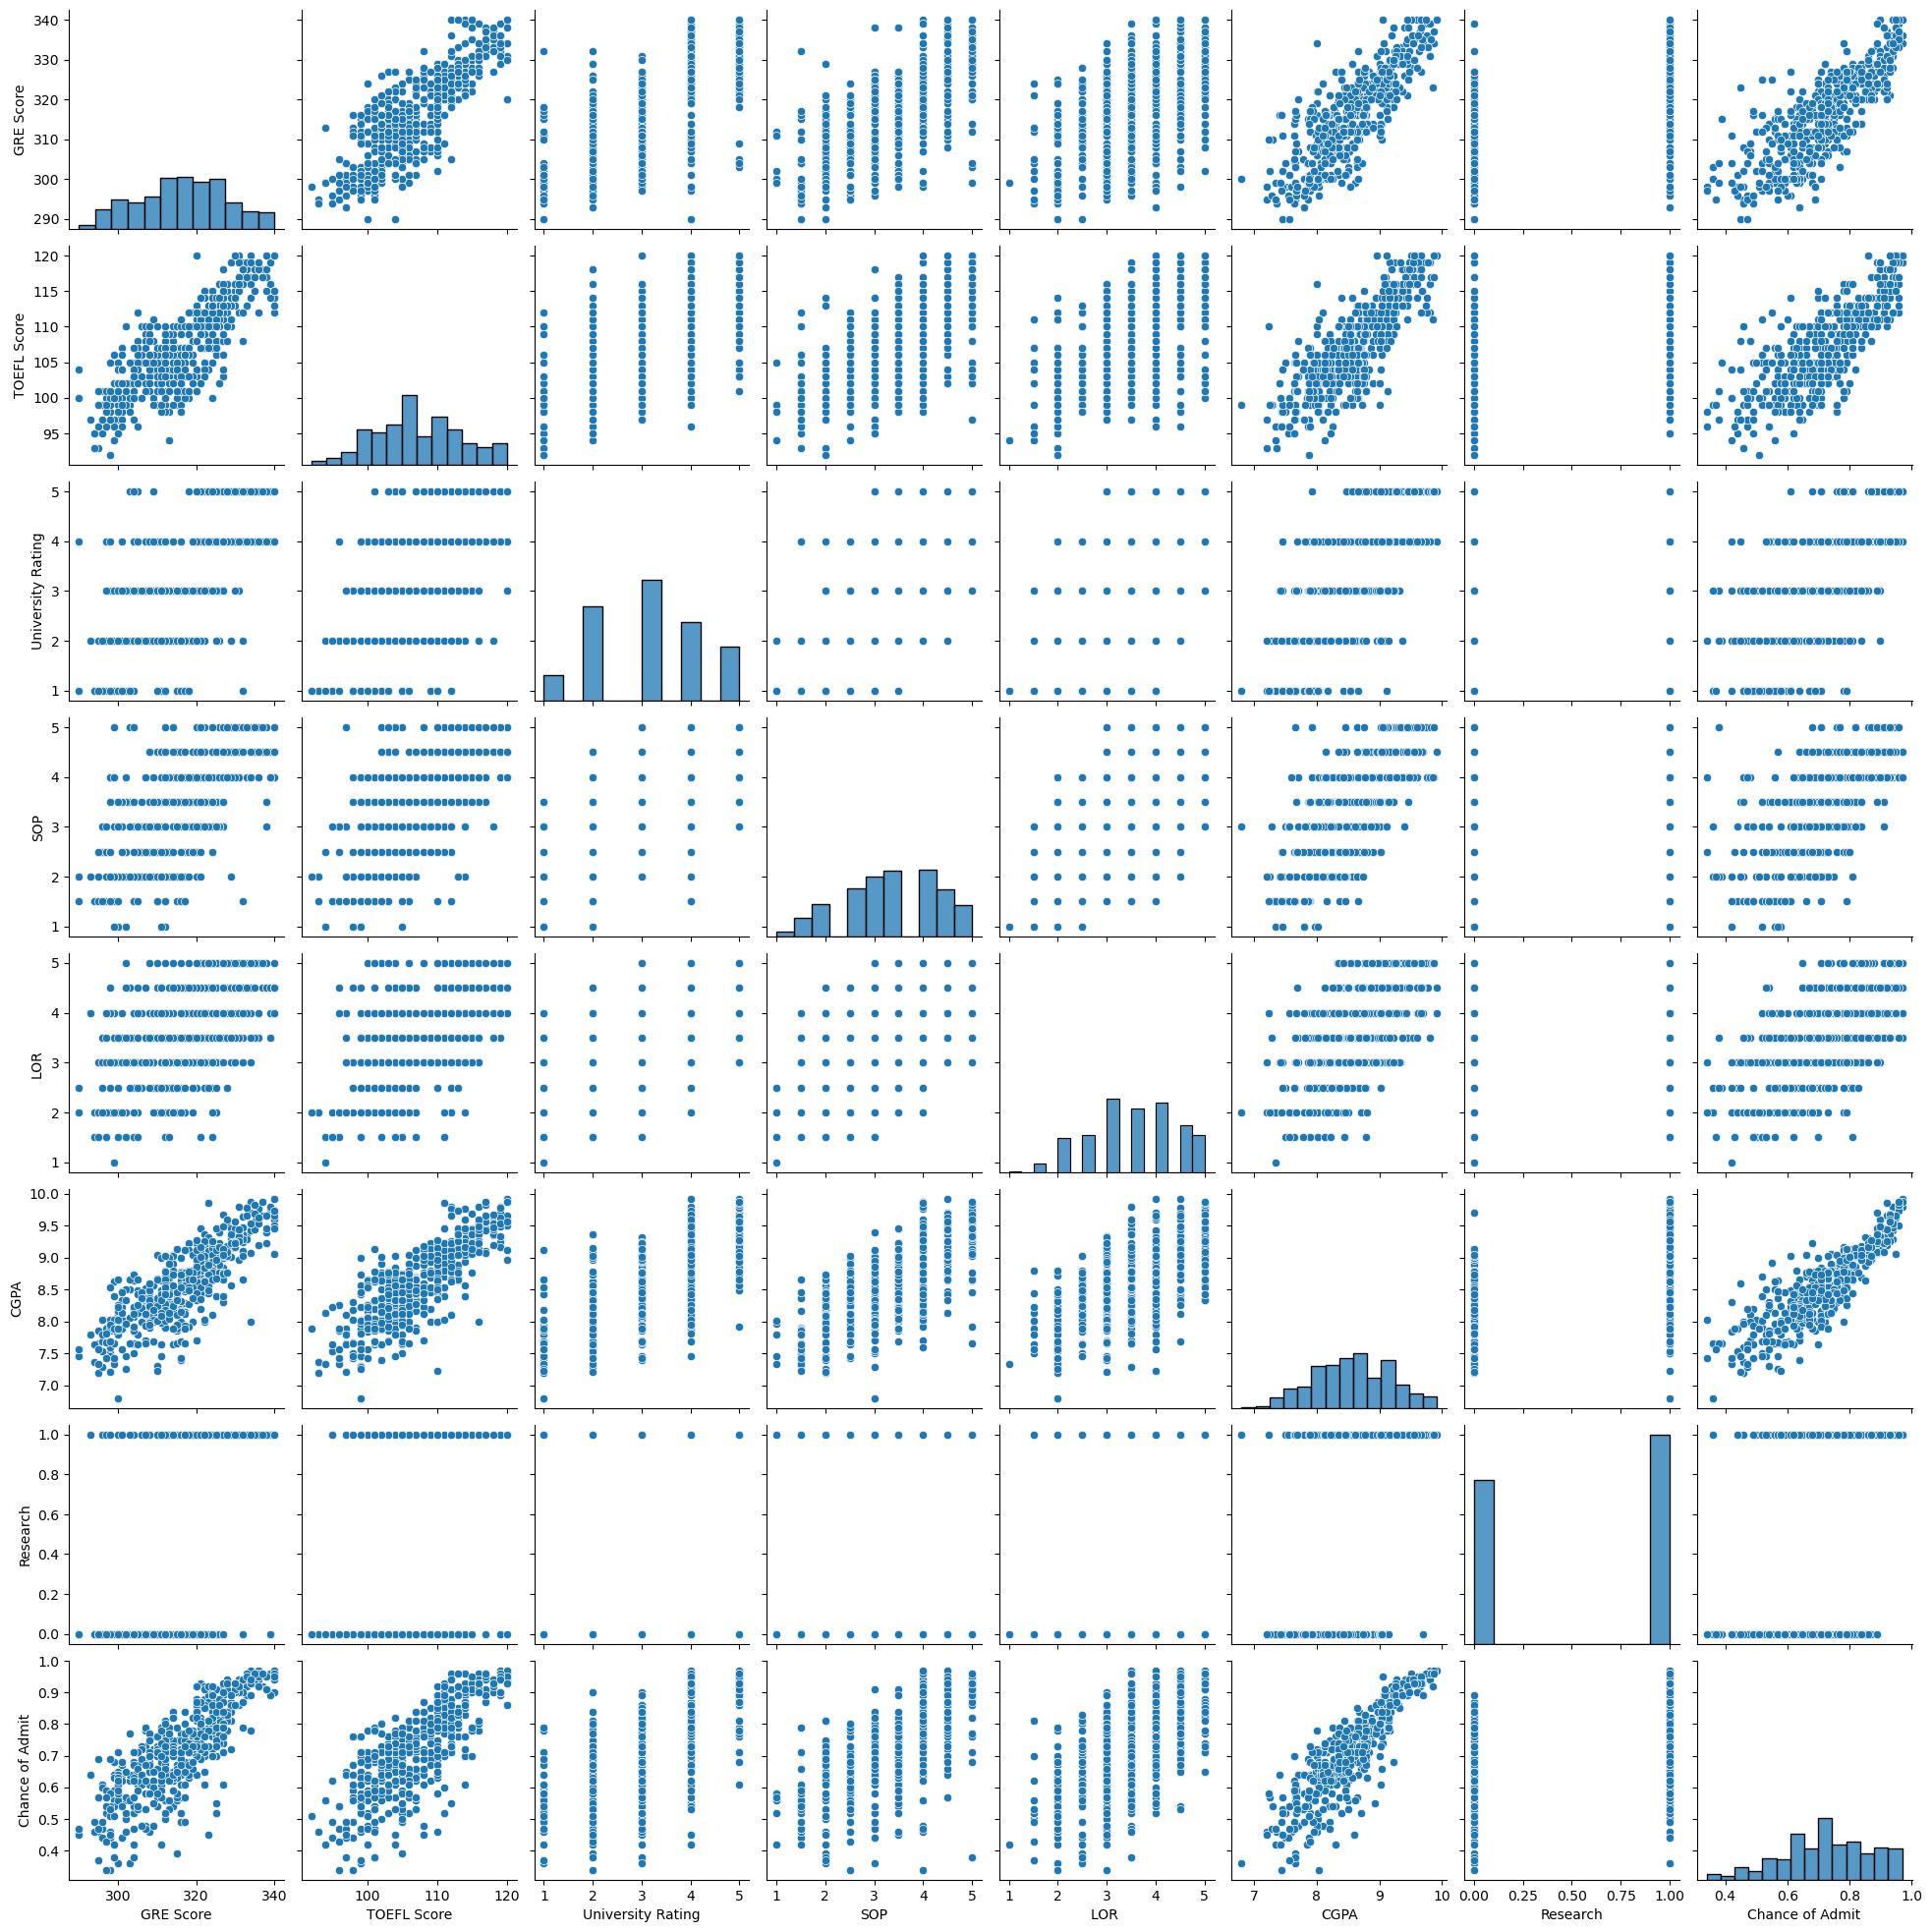

In [252]:
# Lets plot the pairplot
sns.pairplot(add_df)

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

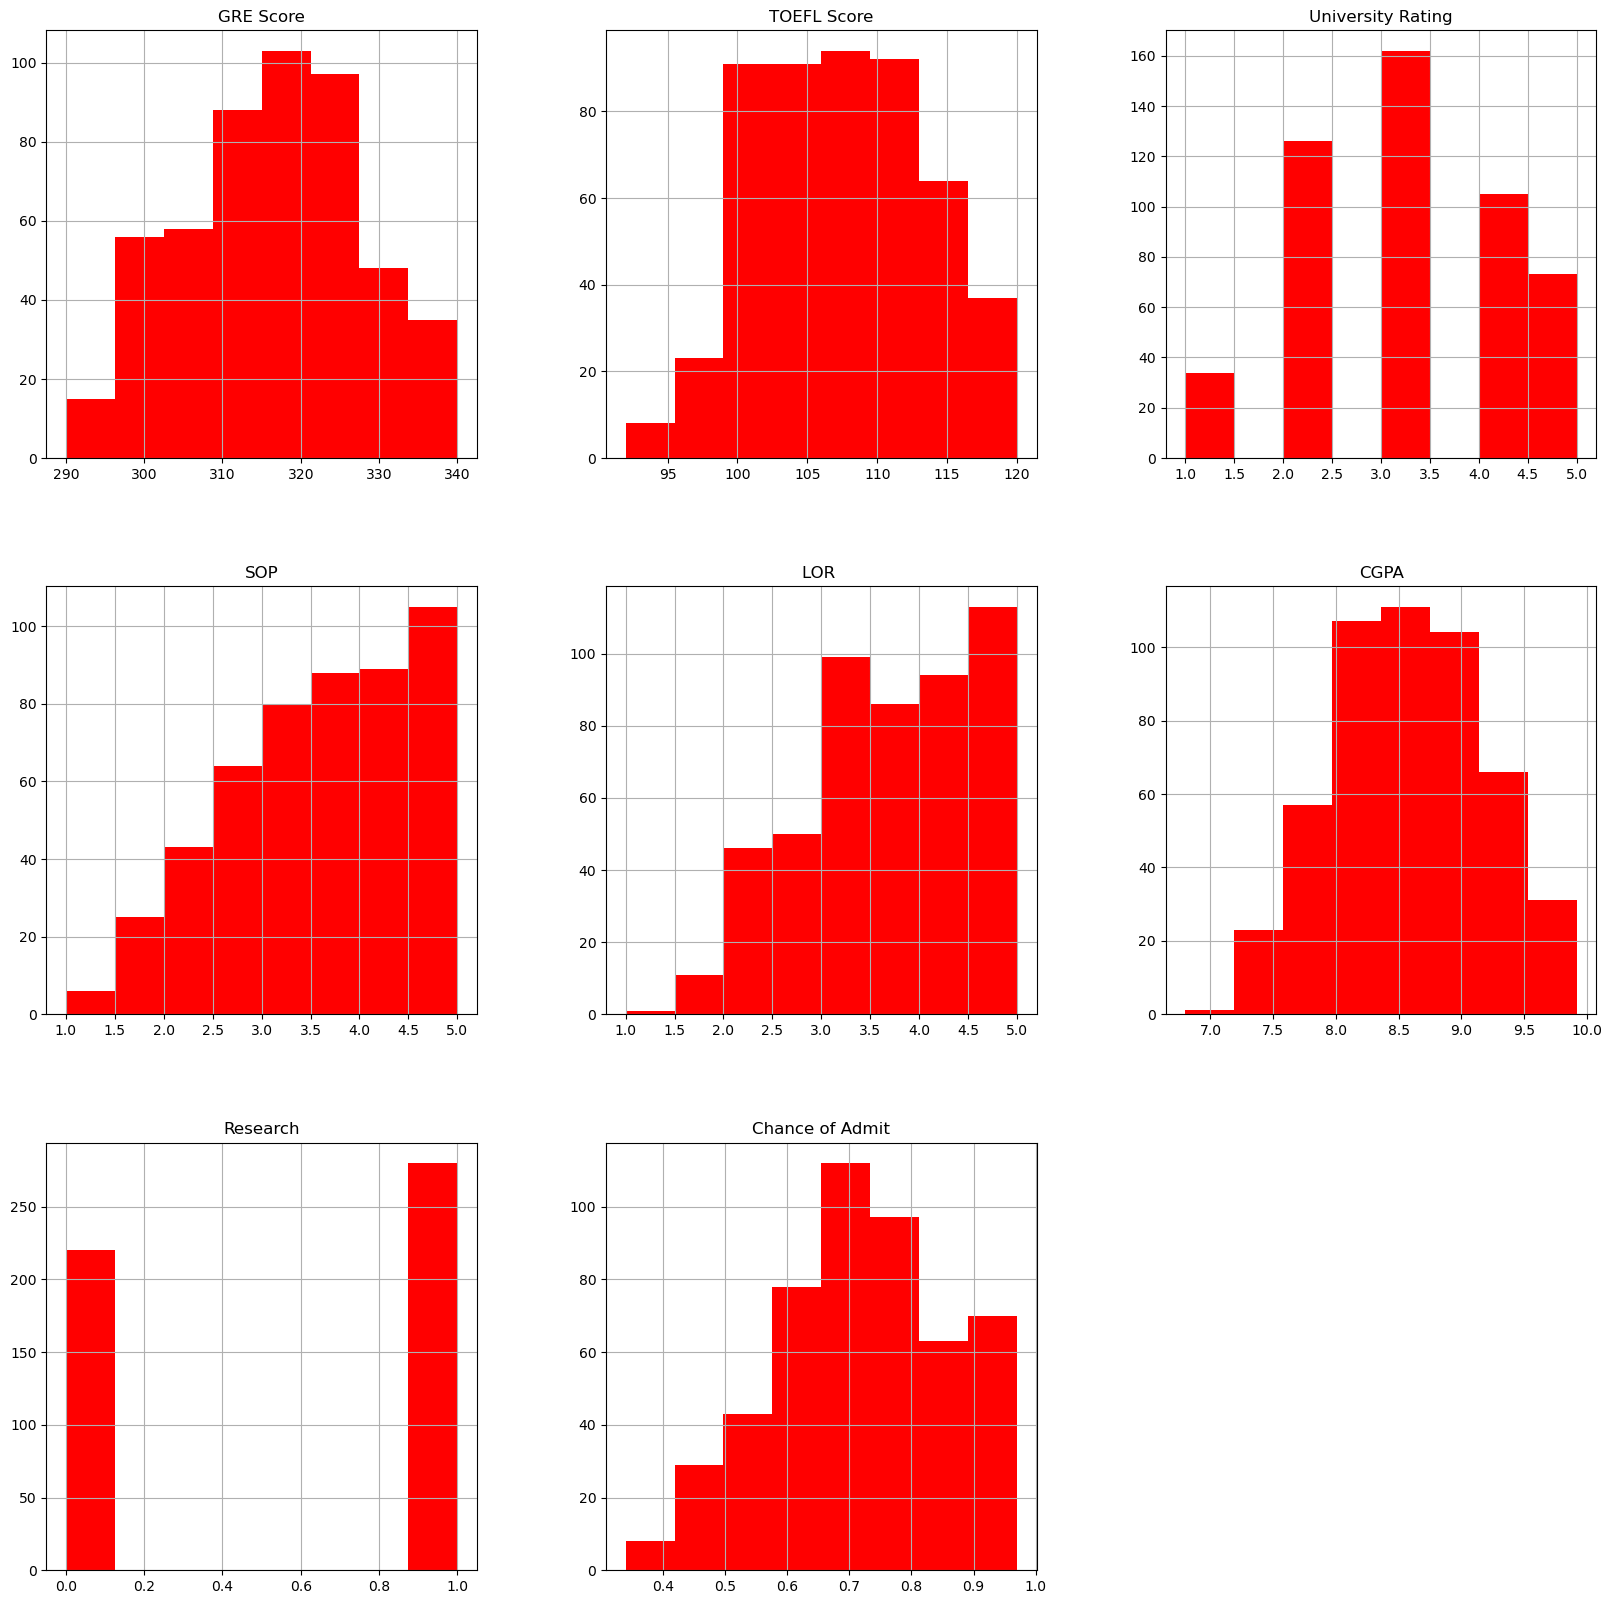

In [253]:
# Lets plot the histogram
add_df.hist(bins = 8 , figsize = (20, 20), color = 'Red')

<Axes: >

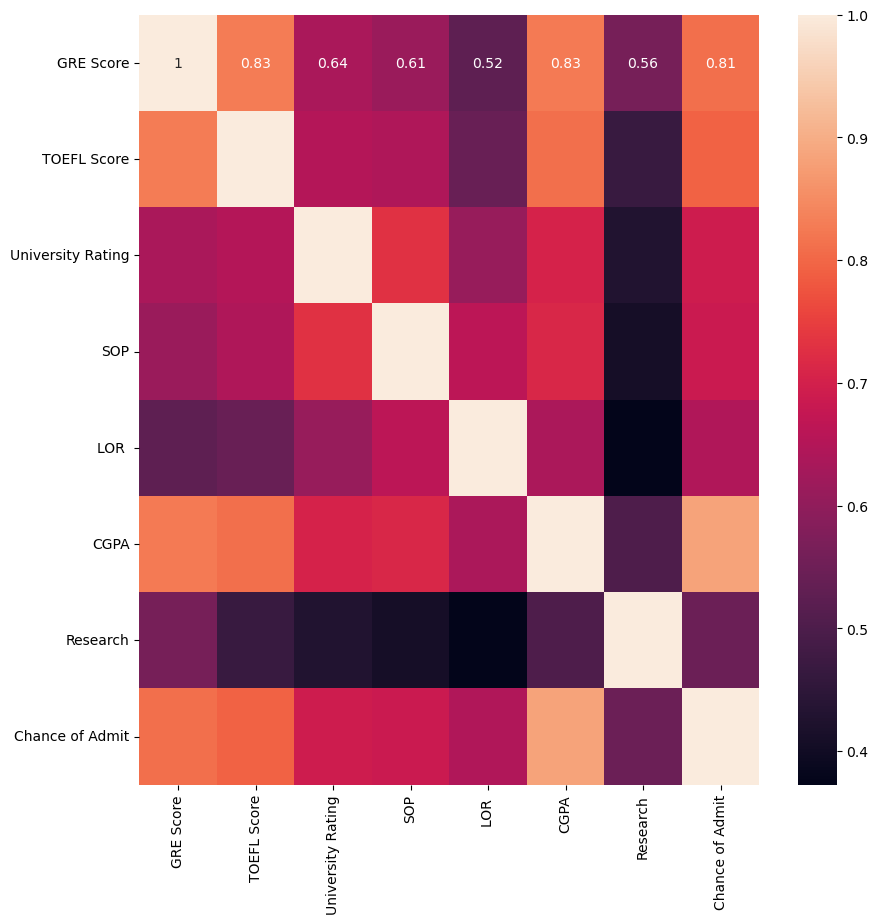

In [254]:
# lets draw the correlation matric of the features
# add_df_corr = add_df.corr(numeric_only= True)
plt.figure(figsize= (10, 10))
sns.heatmap(add_df.corr(), annot= True)

In [255]:
# Lets prepare the data from model training, lets seperate the columns and create X and y

In [256]:
selected_inputs = ['GRE Score',
                   'TOEFL Score',
                   'University Rating',
                   'SOP',
                   'LOR',
                   'CGPA',
                   'Research']

In [257]:
y = add_df['Chance of Admit']

In [258]:
y.shape

(500,)

In [259]:
y = y.values.reshape(-1, 1)

In [260]:
y.shape

(500, 1)

In [261]:
X = add_df.drop(['Chance of Admit'], axis = 1)

In [262]:
X.shape

(500, 7)

In [263]:
# Lets import skitlearn libraries and split the X and y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

In [264]:
X_train.shape

(400, 7)

In [265]:
y_train.shape

(400, 1)

In [266]:
X_test.shape

(100, 7)

In [267]:
y_test.shape

(100, 1)

In [268]:
# Practice opportunity 2 
# Modify the SOP column to make the bubble size variations more prominent

In [269]:
add_df['SOP'] = add_df['SOP'] ** 2

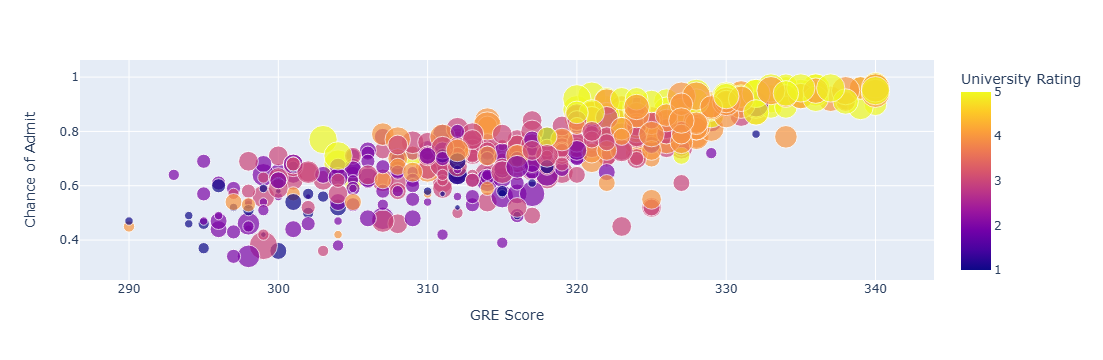

In [270]:
fig2 = px.scatter(data_frame = add_df, x = 'GRE Score', y = 'Chance of Admit', color = 'University Rating', size = 'SOP' )
fig2.show()

In [271]:
add_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,20.25,4.5,9.65,1,0.92
1,324,107,4,16.00,4.5,8.87,1,0.76
2,316,104,3,9.00,3.5,8.00,1,0.72
3,322,110,3,12.25,2.5,8.67,1,0.80
4,314,103,2,4.00,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,20.25,4.0,9.02,1,0.87
496,337,117,5,25.00,5.0,9.87,1,0.96
497,330,120,5,20.25,5.0,9.56,1,0.93
498,312,103,4,16.00,5.0,8.43,0,0.73


In [272]:
# lets train XGBoost algorithm without optimization
# Xgboost is the quite common algorithm used for classifiation and regression use-cases, it has more than 40 different hyperparameters to be tuned
# therefore its best case for hyperparameter optimization using either of Grid, Randomised or Bayesian search

In [273]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [274]:
# Lets write the simple function for calculating the regression model score, this funtion has two inputs ground_truth and predicted output
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import mlflow

def metric_cal(ground_truth, output_prediction): 
    k = X_test.shape[1]
    n = len(X_test)
    RMSE = float(format(np.sqrt(mean_squared_error(ground_truth, output_prediction)),'.3f'))
    MSE = mean_squared_error(ground_truth, output_prediction)
    MAE = mean_absolute_error(ground_truth, output_prediction)
    r2 = r2_score(ground_truth, output_prediction)
    mlflow.log_metric('RMSE', RMSE)
    mlflow.log_metric('MSE', MSE)
    mlflow.log_metric('MAE', MAE)
    mlflow.log_metric('R2', r2)

    print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

In [275]:
import xgboost as xgb
model = xgb.XGBRegressor(objective = 'reg:squarederror',
                         learning_rate = 1,
                         max_depth = 20,
                         n_estimators = 500)

In [276]:
# Now train xgboost regresion model

with mlflow.start_run(run_name = "XGBRegression",
                      description = "Predicting chances of university admission using max_depth = 20"):
    model.fit(X_train, y_train)
    model_params = model.get_xgb_params()
    mlflow.log_param('learning_rate', model_params['learning_rate'])
    mlflow.log_param('max_depth', model_params['max_depth'])
    mlflow.log_param('objective', model_params['objective'])
    mlflow.xgboost.log_model(model, "XGBRegressor", registered_model_name = "XGBRegressor")
    y_predict_v1 = model.predict(X_test)
    metric_cal(y_test, y_predict_v1) # Call the function to predict and record the metrics
    
mlflow.end_run(status = 'FINISHED')

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\xgboost\core.py:160: UserWarning:

[12:00:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

Registered model 'XGBRegressor' already exists. Creating a new version of this model...
2024/06/30 12:00:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor, version 6
Created version '6' of model 'XGBRegressor'.


RMSE = 0.086 
MSE = 0.00748145239182877 
MAE = 0.06192468444108963 
R2 = 0.6125807885749692


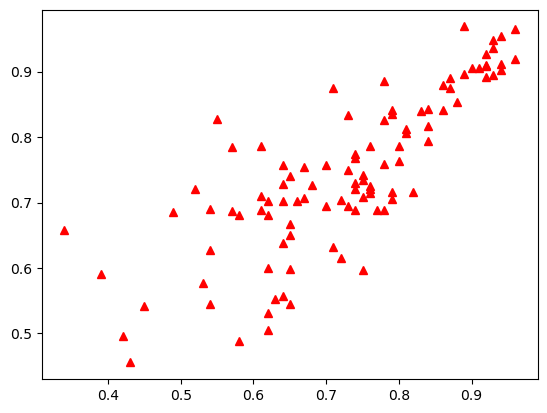

In [277]:
plt.plot(y_test, y_predict_v1, "^", color = 'r')

In [278]:
# Practice 3, Retrain the model with less 'max_depth' and comment on the results

In [279]:
model2 = xgb.XGBRegressor(objective = 'reg:squarederror',
                          learning_rate = 1,
                          max_depth = 5,
                          n_estimators = 500)

with mlflow.start_run(run_name = 'XGBRegression_v2',
                      description = 'Predicting chances of university addmission using max_depth= 5') :
    model2.fit(X_train, y_train)
    model2_params = model2.get_xgb_params()
    mlflow.log_param('learning_rate', model2_params['learning_rate'])
    mlflow.log_param('max_depth', model2_params['max_depth'])
    mlflow.log_param('objective', model2_params['objective'])
    mlflow.xgboost.log_model(model, "XGBRegressor_v2", registered_model_name = "XGBRegressor_v2")
    y_predict_v2 = model_2.predict(X_test)
    metric_cal(y_test, y_predict_v2)

mlflow.end_run(status = 'FINISHED')

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\xgboost\core.py:160: UserWarning:

[12:00:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

Registered model 'XGBRegressor_v2' already exists. Creating a new version of this model...
2024/06/30 12:00:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor_v2, version 2


RMSE = 0.085 
MSE = 0.007244224763294571 
MAE = 0.05982757469415664 
R2 = 0.6248653739684857


Created version '2' of model 'XGBRegressor_v2'.


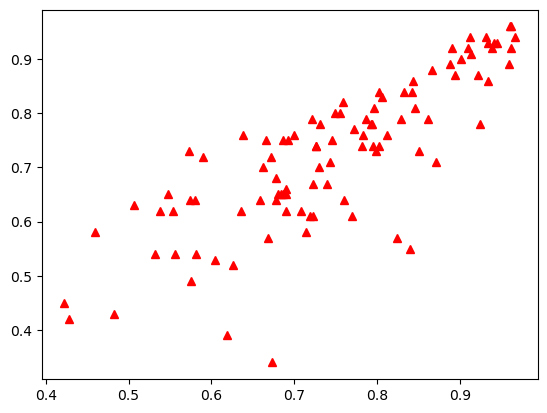

In [280]:
plt.plot(y_predict_v2, y_test, "^", color = 'r')

In [281]:
# Lets perform hyper-parameter optimization using Grid search
# In Grid search we will supply list of hyper parameters to the algorithm ie 3 values of learning rate, 3 values of n_ estimators etc.
# and model will do the passthrough on all of these values 
# Grid search perform exhaustive search across the specified list of parameters
# We will have following number of combinations
# parameters_grid = {'max_depth' : [3, 6, 10],
#                    'learning_rate' : [0.01, 0.05, 0.1],
#                    'n_estimators' : [100, 500, 1000],
#                    'colsample_bytree' : [0.3, 0.7]
#                   }
# Here we have following number of combinations 3*3*3*2=54
# we will run each combination 5 times, since we set the crossvalidation = 5
# Therefore the total number of runs as 54*5 = 270

In [282]:
# Lets import the Grid search
from sklearn.model_selection import GridSearchCV

In [283]:
parameter_grid = {'max_depth' : [3, 6, 10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'n_estimators' : [100, 500, 1000],
                  'colsample_bytree' : [0.3, 0.7]
                 }

In [284]:
import xgboost as xgb

In [285]:
model3 = xgb.XGBRegressor()

In [286]:
xgb_gridsearch = GridSearchCV(estimator = model3,
                              param_grid = parameter_grid,
                              scoring = 'neg_mean_squared_error',
                              cv = 5, # number of iteration 
                              verbose = 5
                             )
with mlflow.start_run(run_name = 'XGBRegressor_GridSearch',
                      description= 'Predicting chances of university addmission using GridSearch for hyperparameter optimization'):
    xgb_gridsearch.fit(X_train, y_train)
    mlflow.log_param('learning_rate', xgb_gridsearch.best_params_['learning_rate'])
    mlflow.log_param('max_depth', xgb_gridsearch.best_params_['max_depth'])
    mlflow.log_param('n_estimators', xgb_gridsearch.best_params_['n_estimators'] )
    mlflow.xgboost.log_model(model, "XGBRegressor_withGridSearch", registered_model_name = "XGBRegressor_withGridSearch")
    y_predict_v3 = xgb_gridsearch.predict(X_test)
    metric_cal(y_test, y_predict_v3)

mlflow.end_run(status = 'FINISHED')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.012 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.007 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.005 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.007 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.005 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.006 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.004 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.002 total

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\xgboost\core.py:160: UserWarning:

[12:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

Registered model 'XGBRegressor_withGridSearch' already exists. Creating a new version of this model...
2024/06/30 12:02:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor_withGridSearch, version 3


RMSE = 0.064 
MSE = 0.004113703474637937 
MAE = 0.04152292474508285 
R2 = 0.7869761548009975


Created version '3' of model 'XGBRegressor_withGridSearch'.


In [287]:
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [288]:
xgb_gridsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100}

In [289]:
xgb_gridsearch.best_score_

-0.004021966334067166

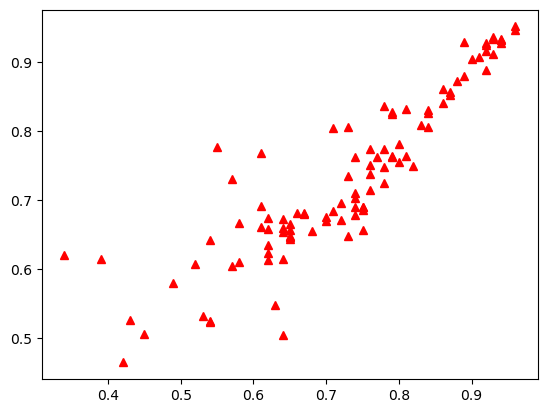

In [290]:
plt.plot(y_test, y_predict_v3, '^', color = 'r')

In [291]:
# Now lets repeat these step for the Randomized search
# Grid search works better when number of parameters are limited
# In the scenarios where the number of search space is large, Randomised search is prefered
# Here we select random combination of few hyperparameters
# We have the freedom and control over number of iteratins ie cross-validation

In [292]:
from sklearn.model_selection import RandomizedSearchCV

In [293]:
parameter_grid = {'max_depth' : [2, 3, 5],
                  'learning_rate' : [0.1, 0.5, 1],
                  'n_estimators' : [100, 500, 700],
                  'min_child_weight' : [1, 2, 3]
                 }

In [294]:
model_4 = xgb.XGBRegressor()

In [295]:
xgb_randomizedsearch = RandomizedSearchCV(estimator = model_4,
                                          param_distributions = parameter_grid,
                                          cv = 5,
                                          n_iter = 50, # number of iteration is only 50
                                          scoring = 'neg_mean_absolute_error',
                                          verbose = 5,
                                          return_train_score = True
                                         )
with mlflow.start_run(run_name = 'XGBRegressor_RandomizedSearch',
                      description= 'Predicting chances of university addmission using RandomizedSearch for hyperparameter optimization'):
    xgb_randomizedsearch.fit(X_train, y_train)
    mlflow.log_param('learning_rate', xgb_randomizedsearch.best_params_['learning_rate'])
    mlflow.log_param('max_depth', xgb_randomizedsearch.best_params_['max_depth'])
    mlflow.log_param('n_estimators', xgb_randomizedsearch.best_params_['n_estimators'] )
    mlflow.xgboost.log_model(model, "XGBRegressor_withRandomizedSearch", registered_model_name = "XGBRegressor_withRandomizedSearch")
    y_predict_v4 = xgb_randomizedsearch.predict(X_test)
    metric_cal(y_test, y_predict_v4)

mlflow.end_run(status = 'FINISHED')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.014, test=-0.055) total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.014, test=-0.051) total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.017, test=-0.038) total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.014, test=-0.056) total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100;, score=(train=-0.015, test=-0.047) total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, min_child_weight=2, n_estimators=700;, score=(train=-0.001, test=-0.065) total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=3, min_child_weight=2, n_estimators=700;, score=(train=-0.001, test=-0.058) to

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\xgboost\core.py:160: UserWarning:

[12:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

Registered model 'XGBRegressor_withRandomizedSearch' already exists. Creating a new version of this model...
2024/06/30 12:03:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor_withRandomizedSearch, version 2
Created version '2' of model 'XGBRegressor_withRandomizedSearch'.


RMSE = 0.061 
MSE = 0.00376429166634432 
MAE = 0.03864662382602691 
R2 = 0.8050700809722791


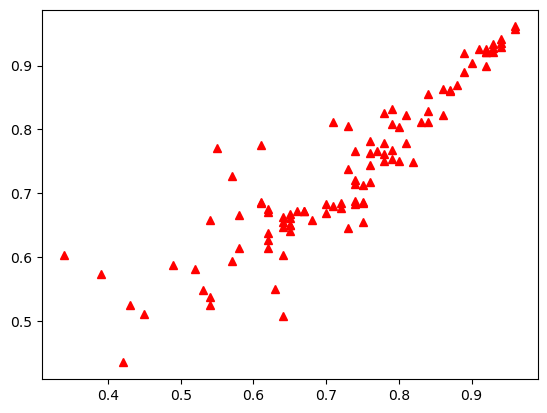

In [296]:
plt.plot(y_test, y_predict_v4, '^', color = 'r')

In [297]:
metric_cal(y_test, y_predict_v4)

RMSE = 0.061 
MSE = 0.00376429166634432 
MAE = 0.03864662382602691 
R2 = 0.8050700809722791


In [298]:
# Lets perform the hyperparameter optimization using Bayesian search
# Bayesian search overcomes drawbacks of randomized search by exploring search space in more efficient manner
# In the given search space if it came across any region which is promising where the error is minimum, Bayesian search explore that region 
# more which increase the chances of better performance

In [299]:
# Lets install the library called skopt (scikitlearn-optimised) which is used to perform Bayesian search
!pip install scikit-optimize


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [300]:
from skopt import BayesSearchCV
import xgboost as xgb

In [301]:
model_5 = xgb.XGBRegressor()

In [302]:
search_space = {
    "learning_rate": (0.01, 1.0, "log-uniform"),
    "max_depth": (1, 50),
    "n_estimators": (5, 500),
}

In [305]:
xgb_bayesiansearch = BayesSearchCV(model_5,
                                   search_space,
                                   n_iter = 50,
                                   scoring = 'neg_mean_absolute_error',
                                   cv = 5
                                 )
with mlflow.start_run(run_name = 'XGBRegressor_BayesianSearch',
                      description= 'Predicting chances of university addmission using BayesianSearch for hyperparameter optimization'):
    xgb_bayesiansearch.fit(X_train, y_train)
    mlflow.log_param('learning_rate', xgb_bayesiansearch.best_params_['learning_rate'])
    mlflow.log_param('max_depth', xgb_bayesiansearch.best_params_['max_depth'])
    mlflow.log_param('n_estimators', xgb_bayesiansearch.best_params_['n_estimators'] )
    mlflow.xgboost.log_model(model, "XGBRegressor_withbBayesianSearch", registered_model_name = "XGBRegressor_withbBayesianSearch")
    y_predict_v5 = xgb_bayesiansearch.predict(X_test)
    metric_cal(y_test, y_predict_v5)

mlflow.end_run(status = 'FINISHED')

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\xgboost\core.py:160: UserWarning:

[12:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

Registered model 'XGBRegressor_withbBayesianSearch' already exists. Creating a new version of this model...
2024/06/30 12:10:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor_withbBayesianSearch, version 2


RMSE = 0.062 
MSE = 0.0038955564513813825 
MAE = 0.03972240552902222 
R2 = 0.7982726709449857


Created version '2' of model 'XGBRegressor_withbBayesianSearch'.


In [ ]:
xgb_bayesiansearch.best_estimator_

In [ ]:
xgb_bayesiansearch.best_params_

In [ ]:
y_predict_v5 = xgb_bayesiansearch.predict(X_test)

In [ ]:
y_predict_v5

In [ ]:
plt.plot(y_predict_v5, y_test, '^', color = 'r')